In [34]:
# Criando os dados que serão usados no método fit
import pandas as pd  

dados = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [1.3,1.8,3.5,4,4.6]
})

dados.head(2)

,x,y
0,1,1.3
1,2,1.8


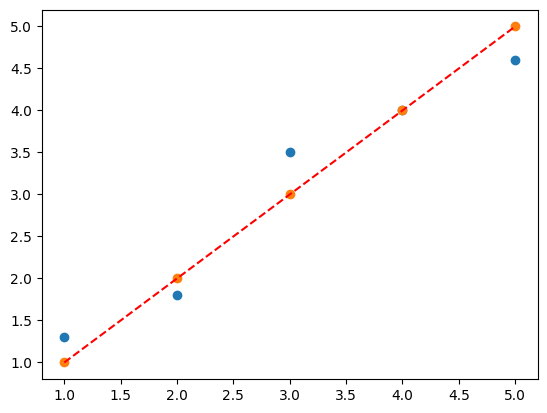

In [46]:
# Visualizando os pontos gráficamente para comparação 
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.scatter(dados.x,dados.y)
ax.plot(dados.x,dados.y_reta, '--r') # r seguinifica que vai ser uma linha trassejada vermelha
ax.scatter(dados.x,dados.y_reta)

plt.show()

In [36]:
dados['y_reta'] = dados.x

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
dados.x.values.reshape(-1, 1) # o array deve ser transformado em arrey 2d utilizando o método reshape(-1, 1), utilizar o método values para pegar apenas os valores, sem
# sem indices e etc.. pois o reshape não recebe series 

array([[1],
       [2],
       [3],
       [4],
       [5]], dtype=int64)

In [39]:
# regressor criado (modelo já passado o fit)
reg = LinearRegression().fit(dados.x.values.reshape(-1, 1), dados.y)

In [40]:
# visualizar o coeficiente angular, toda reta tem um coefieinte angular e linear utilizados para traçar retas
a = reg.coef_[0]

In [41]:
# coeficiente linear
b = reg.intercept_

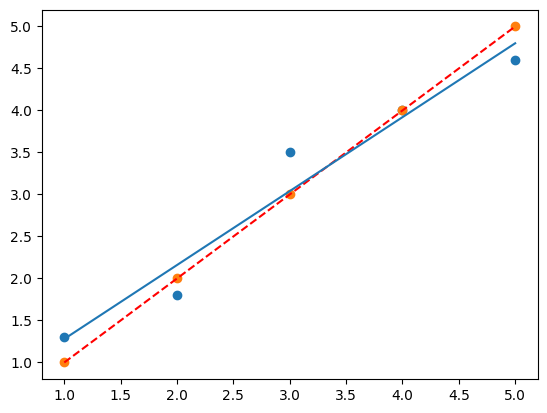

In [42]:
# plotando o gráfico atualizado traçando a reta feita pelo coecifiente linear e o angular
# y vai ser utilizado a equação da reta ax+b( a é o primeiro coeficiente angular )

fig,ax = plt.subplots()

ax.scatter(dados.x,dados.y)
ax.plot(dados.x,dados.y_reta, '--r') # r seguinifica que vai ser uma linha trassejada vermelha
ax.scatter(dados.x,dados.y_reta)

x = dados.x.values
y = a*x+b
ax.plot(x,y)

plt.show()

In [44]:
# Fazendo a previsão e adicionando a base, cada valor equivale a cada ponto
# salver na base de dados 
dados['y_pred'] = reg.predict(dados.x.values.reshape(-1,1))

In [45]:
# visualizando predicção
dados

,x,y,y_reta,y_pred
0,1,1.3,1,1.28
1,2,1.8,2,2.16
2,3,3.5,3,3.04
3,4,4.0,4,3.92
4,5,4.6,5,4.80


In [51]:
# Calculando o erro da reta vermelha e da regressão
# dados.y - dados.y_reta elevado a 2
# exemplo: 1.8 - 2 elevado ao **2 quadrado
dados['erro_reta'] = (dados.y - dados.y_reta)**2
dados['erro_pred'] = (dados.y - dados.y_pred)**2

In [52]:
dados

,x,y,y_reta,y_pred,erro_reta,erro_pred
0,1,1.3,1,1.28,0.09,0.0004
1,2,1.8,2,2.16,0.04,0.1296
2,3,3.5,3,3.04,0.25,0.2116
3,4,4.0,4,3.92,0.00,0.0064
4,5,4.6,5,4.80,0.16,0.0400


In [53]:
# Verificando essa base e a soma do erro
dados[['erro_reta', 'erro_pred']].sum()

erro_reta    0.540
erro_pred    0.388
dtype: float64

In [54]:
# Pode se usar o média absoluto e o erro médio quadrático do próprio scikit 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [56]:
# Visualizando o resultado da previsão
print(mean_absolute_error(dados.y, dados.y_reta))
print(mean_squared_error(dados.y,dados.y_reta))
print(mean_absolute_error(dados.y, dados.y_pred))
print(mean_squared_error(dados.y,dados.y_pred))

0.2800000000000001
0.10800000000000005
0.22400000000000003
0.07760000000000003


In [ ]:
# Fazendo outra analise com outros dados

In [65]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [66]:
# visualizando 
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [71]:
# Transformando em dataframe
import pandas as pd 

casas = pd.DataFrame(data.data) # colocando a variavel data e a coluna data 
casas.columns = data.feature_names # colocando nome em cada coluna
casas['MedHouseVal'] = data.target # adicionando uma nova coluna utlizando com target

In [72]:
casas

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [73]:
# Utilizar a regressão linear simples pegando uma unica coluna - pois relaciona uma coluna com o target na regressão linear simples - na multipla mais de 1 coluna

# separando x e y

x = casas.MedInc
y = casas.MedHouseVal


In [77]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
 

In [78]:
# usando a regressão linear
reg = LinearRegression().fit(x_train.values.reshape(-1,1), y_train)

In [79]:
# Avaliando o erro
y_pred = reg.predict(x_test.values.reshape(-1,1))

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test,y_pred))

0.6265986453094173
0.7028461448540977


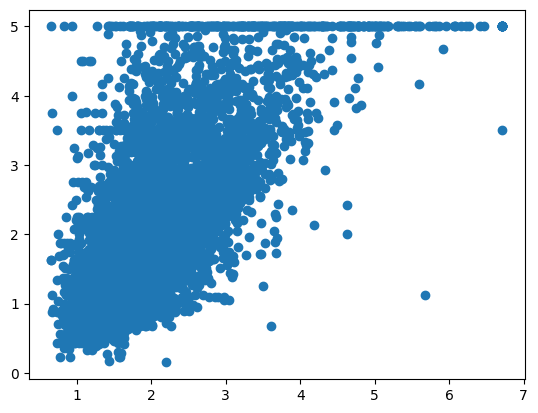

In [96]:
# visualizando a relaçao do y_test com o y_pred
fig,ax = plt.subplots()

ax.scatter(y_pred,y_test)



plt.show()

In [100]:
# Utilizando a regressão linear multipla pegando todas as colunas
x = casas.drop('MedHouseVal',axis=1)
y = casas.MedHouseVal

In [101]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [102]:
# Usando a regressão linear
reg = LinearRegression().fit(x_train, y_train)

In [103]:
# da mesma forma, tem coef_
reg.coef_

array([ 4.44870466e-01,  9.55004561e-03, -1.21991503e-01,  7.79144696e-01,
       -7.68990809e-08, -3.29948505e-03, -4.19131153e-01, -4.34103468e-01])

In [104]:
# E o intercept_
reg.intercept_

-37.08201093907992

In [105]:
# Avaliando o erro
y_pred = reg.predict(x_test)

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test,y_pred))

0.5295710106684448
0.5369686543372468


In [106]:
# ir analisando se os valores melhoraram ou pioraram ao adiconar essa nova coluna, no caso piorou os valores ao adicionar a coluna banheiro
# após isso, foi removido só a coluna do banheiro e adicionado todas as colunas, menos as que temos que prever, eliminando com o método drop a coluna MedHouseVal

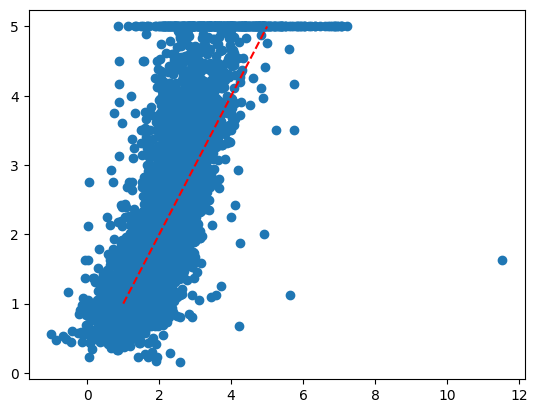

In [108]:
# VIsualizando a relação  do y_test  com o y_pred, atualizando a plotando com uma reta para se ajustar aos dados
fig,ax = plt.subplots()

ax.scatter(y_pred,y_test)
ax.plot([1,5],[1,5],'--r')



plt.show()